In [217]:
import requests
import json

In [231]:
from scipy.stats import linregress

In [245]:
import seaborn as sns
import numpy as np
import scipy.stats
#to graph r**2
#def r2(x, y):
#    return stats.pearsonr(x,y)[0]**2
sns.jointplot(x, y, kind="reg", stat_func=r2)
#calcs slope, intercept, rvalue, pvalue, sterr
#requires scipy.stats linregress library
#linregress(x,y)

In [218]:
import matplotlib.pyplot as plt

In [219]:
import pandas as pd

In [220]:
%matplotlib inline

In [221]:
import mysql.connector

In [222]:
import stuff

In [223]:
cnx = mysql.connector.connect(
    host = stuff.host,
    user = stuff.user,
    passwd = stuff.password)

In [224]:
cursor = cnx.cursor()

In [225]:
cnx.database = 'movie_project'

In [29]:
cursor.execute("""SELECT * FROM mojo_data LIMIT 9;
""")

In [30]:
df = pd.DataFrame(cursor.fetchall())

In [31]:
df.columns = [x[0] for x in cursor.description]

In [33]:
df

,title,days_in_theater,opening_revenue,gross_revenue
0,Insidious: The Last Key,83.0,29581355.0,67745330
1,In Between,125.0,5888.0,104451
2,In the Land of Pomegranates,13.0,3072.0,7014
3,Bob le Flambeur,83.0,4623.0,15586
4,Django,48.0,11722.0,19554
5,Goldbuster,27.0,79180.0,149072
6,Namiya,13.0,39584.0,66176
7,None,9.0,NaN,549602
8,Alien Intrusion: Unmasking a Deception,NaN,NaN,237411


In [35]:
df

,title,days_in_theater,opening_revenue,gross_revenue
0,Insidious: The Last Key,83.0,29581355.0,67745330
1,In Between,125.0,5888.0,104451
2,In the Land of Pomegranates,13.0,3072.0,7014
3,Bob le Flambeur,83.0,4623.0,15586
4,Django,48.0,11722.0,19554
5,Goldbuster,27.0,79180.0,149072
6,Namiya,13.0,39584.0,66176
7,None,9.0,NaN,549602
8,Alien Intrusion: Unmasking a Deception,NaN,NaN,237411


In [58]:
df.title.isna()

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8    False
Name: title, dtype: bool

In [66]:
df.dropna(subset=['title'],inplace=True)

In [69]:
df.dropna(subset=['days_in_theater'],inplace=True)

In [70]:
df

,title,days_in_theater,opening_revenue,gross_revenue
0,Insidious: The Last Key,83.0,29581355.0,67745330
1,In Between,125.0,5888.0,104451
2,In the Land of Pomegranates,13.0,3072.0,7014
3,Bob le Flambeur,83.0,4623.0,15586
4,Django,48.0,11722.0,19554
5,Goldbuster,27.0,79180.0,149072
6,Namiya,13.0,39584.0,66176


In [40]:
df.iloc[0:2]

,title,days_in_theater,opening_revenue,gross_revenue
0,Insidious: The Last Key,83.0,29581355.0,67745330
1,In Between,125.0,5888.0,104451


In [32]:
list(df['days_in_theater'])

[83.0, 125.0, 13.0, 83.0, 48.0, 27.0, 13.0, 9.0, nan]

In [34]:
list(df['opening_revenue'])

[29581355.0, 5888.0, 3072.0, 4623.0, 11722.0, 79180.0, 39584.0, nan, nan]

In [ ]:
list(df['gross_revenue'])

In [79]:
cursor.execute("""SELECT title,days_in_theater,gross_revenue FROM mojo_data;
""")
data = pd.DataFrame(cursor.fetchall())
data.columns = [x[0] for x in cursor.description]

In [80]:
data

,title,days_in_theater,gross_revenue
0,Insidious: The Last Key,83.0,67745330
1,In Between,125.0,104451
2,In the Land of Pomegranates,13.0,7014
3,Bob le Flambeur,83.0,15586
4,Django,48.0,19554
5,Goldbuster,27.0,149072
6,Namiya,13.0,66176
7,None,9.0,549602
8,Alien Intrusion: Unmasking a Deception,NaN,237411
9,My Art,27.0,11762


In [81]:
data.dropna(subset=['title'],inplace=True)

In [82]:
data

,title,days_in_theater,gross_revenue
0,Insidious: The Last Key,83.0,67745330
1,In Between,125.0,104451
2,In the Land of Pomegranates,13.0,7014
3,Bob le Flambeur,83.0,15586
4,Django,48.0,19554
5,Goldbuster,27.0,149072
6,Namiya,13.0,66176
8,Alien Intrusion: Unmasking a Deception,NaN,237411
9,My Art,27.0,11762
10,The Commuter,62.0,36343858


In [83]:
data.dropna(subset=['days_in_theater'],inplace=True)

In [84]:
data.dropna(subset=['gross_revenue'],inplace=True)

In [86]:
list(data['gross_revenue'])

[67745330,
 104451,
 7014,
 15586,
 19554,
 149072,
 66176,
 11762,
 36343858,
 40891591,
 75929,
 18877,
 36215,
 20877013,
 19696,
 646497,
 69431,
 61133,
 447719,
 320079,
 215295,
 64994,
 2418404,
 41934,
 35757,
 25183,
 4547,
 187360,
 45819713,
 44947622,
 7216,
 16376066,
 313088,
 10638033,
 16500,
 4537,
 75134,
 12965,
 57902320,
 1926,
 9425,
 77854,
 124573,
 24955,
 390207,
 4592,
 118352,
 28550,
 26699,
 3392,
 25091816,
 37183,
 217681,
 1895840,
 58751,
 4400,
 100407760,
 41888,
 115253424,
 1670192,
 21786,
 36276286,
 2783739,
 1115018,
 220682,
 74720,
 95987,
 11140,
 114603,
 94450,
 36613,
 55225,
 1983984,
 706153,
 8267544,
 40428,
 41072,
 7470,
 700059566,
 116352,
 749827,
 4719928,
 6102076,
 5518,
 32732301,
 8982,
 125659,
 69179066,
 208351,
 436059,
 26630,
 19084,
 17646,
 1764201,
 21497,
 918127,
 39985,
 615633,
 23833,
 34017028,
 12189,
 373293,
 46860157,
 17015,
 18157,
 4580,
 83418,
 13210,
 24586708,
 4969853,
 3072605,
 8047856,
 37115,


In [87]:
list(data['days_in_theater'])

[83.0,
 125.0,
 13.0,
 83.0,
 48.0,
 27.0,
 13.0,
 27.0,
 62.0,
 62.0,
 13.0,
 97.0,
 55.0,
 55.0,
 27.0,
 97.0,
 27.0,
 195.0,
 20.0,
 4.0,
 2.0,
 134.0,
 77.0,
 27.0,
 27.0,
 41.0,
 6.0,
 41.0,
 69.0,
 62.0,
 2.0,
 111.0,
 176.0,
 31.0,
 44.0,
 6.0,
 41.0,
 20.0,
 97.0,
 6.0,
 27.0,
 83.0,
 9.0,
 134.0,
 107.0,
 62.0,
 20.0,
 48.0,
 41.0,
 6.0,
 55.0,
 16.0,
 97.0,
 41.0,
 58.0,
 2.0,
 55.0,
 23.0,
 125.0,
 27.0,
 13.0,
 62.0,
 34.0,
 4.0,
 1.0,
 92.0,
 64.0,
 11.0,
 20.0,
 27.0,
 48.0,
 83.0,
 48.0,
 20.0,
 41.0,
 27.0,
 132.0,
 13.0,
 174.0,
 20.0,
 83.0,
 55.0,
 27.0,
 6.0,
 55.0,
 2.0,
 83.0,
 118.0,
 37.0,
 55.0,
 20.0,
 41.0,
 48.0,
 4.0,
 1.0,
 2.0,
 20.0,
 111.0,
 76.0,
 90.0,
 6.0,
 125.0,
 97.0,
 125.0,
 111.0,
 69.0,
 135.0,
 69.0,
 83.0,
 27.0,
 48.0,
 139.0,
 13.0,
 104.0,
 146.0,
 62.0,
 118.0,
 20.0,
 105.0,
 27.0,
 41.0,
 16.0,
 16.0,
 72.0,
 90.0,
 90.0,
 118.0,
 132.0,
 76.0,
 120.0,
 31.0,
 160.0,
 125.0,
 83.0,
 20.0,
 16.0,
 9.0,
 66.0,
 86.0,
 90.0,
 90.0,
 55.0

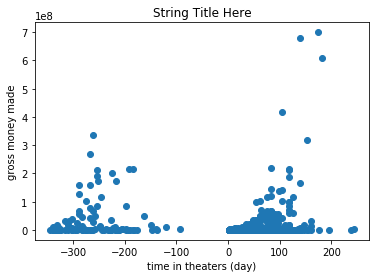

In [90]:
plt.scatter(list(data['days_in_theater']),list(data['gross_revenue']))
plt.xlabel('time in theaters (day)')
plt.ylabel('gross money made')
plt.title('String Title Here')
plt.show()

In [108]:
cursor.execute("""SELECT title,opening_revenue, gross_revenue FROM mojo_data;
""")
data1 = pd.DataFrame(cursor.fetchall())
data1.columns = [x[0] for x in cursor.description]

In [110]:
data1.dropna(subset=['title'], inplace = True)

In [112]:
len(data1)

783

In [113]:
data1.dropna(subset = ['opening_revenue'], inplace = True)

In [114]:
len(data1)

686

In [117]:
data1.dropna(subset = ['gross_revenue'], inplace = True)

In [118]:
len(data1)

686

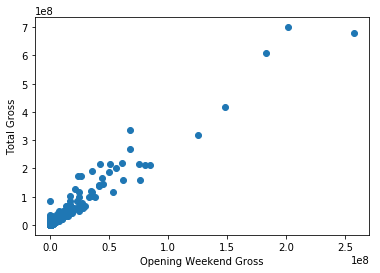

In [120]:
plt.scatter(list(data1['opening_revenue']),list(data1['gross_revenue']))
plt.xlabel('Opening Weekend Gross')
plt.ylabel('Total Gross')
plt.show()

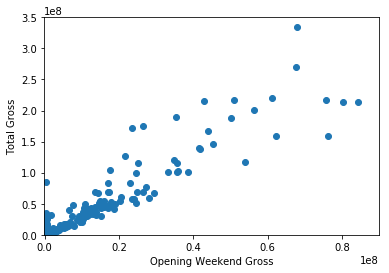

In [191]:
plt.scatter(list(data1['opening_revenue']),list(data1['gross_revenue']))
plt.xlabel('Opening Weekend Gross')
plt.ylabel('Total Gross')
axes = plt.gca()
axes.set_xlim([-100000,90000000])
axes.set_ylim([-100000,350000000])
plt.show()

In [211]:
cursor.execute("""SELECT title,opening, gross FROM correlation;
""")
data5 = pd.DataFrame(cursor.fetchall())
data5.columns = [x[0] for x in cursor.description]

In [212]:
data5.dropna(subset=['title'], inplace = True)

In [213]:
data5.dropna(subset=['opening'], inplace = True)

In [214]:
data5.dropna(subset=['gross'], inplace = True)

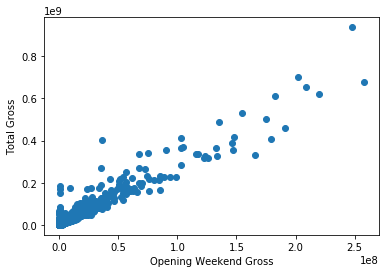

In [215]:
plt.scatter(list(data5['opening']),list(data5['gross']))
plt.xlabel('Opening Weekend Gross')
plt.ylabel('Total Gross')
plt.show()

In [216]:
len(list(data5['opening']))

2852

In [226]:
cursor.execute("""SELECT title,opening, gross FROM correlation;
""")
data6 = pd.DataFrame(cursor.fetchall())
data6.columns = [x[0] for x in cursor.description]

In [227]:
data6.dropna(subset=['title'], inplace = True)

In [228]:
data6.dropna(subset=['opening'], inplace = True)

In [229]:
data6.dropna(subset=['gross'], inplace = True)

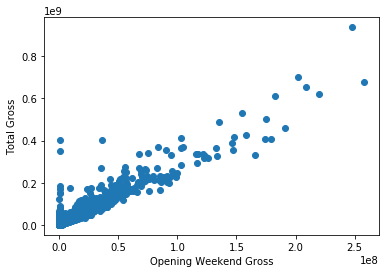

In [260]:
plt.scatter(list(data6['opening']),list(data6['gross']))
plt.xlabel('Opening Weekend Gross')
plt.ylabel('Total Gross')
plt.show()

In [237]:
linregress(list(data6['opening']),list(data6['gross']))

LinregressResult(slope=2.9541514255115677, intercept=1717409.6576426867, rvalue=0.9501713409670237, pvalue=0.0, stderr=0.01499597034638443)

In [250]:
def predict_gross (opening_data):
    y = 2.9541514255115677*(opening_data)+1717409.6576426867
    return y

In [261]:
predict_gross(150000000)

444840123.4843778

In [238]:
print(0.9501713409670237*0.9501713409670237)

0.9028255771950721


In [246]:
r2(list(data6['opening']),list(data6['gross']))

NameError: name 'stats' is not defined

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


NameError: name 'stats' is not defined

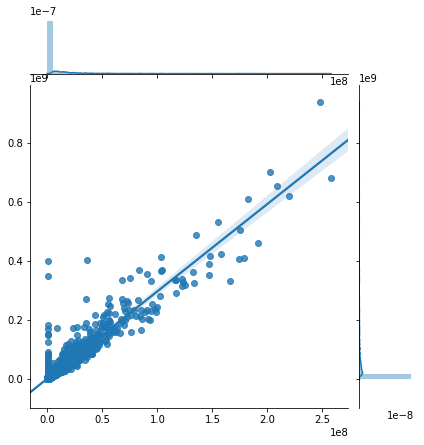

In [247]:
sns.jointplot(list(data6['opening']),list(data6['gross']), kind="reg", stat_func=r2)

In [ ]:
#to graph r**2
#def r2(x, y):
    #return stats.pearsonr(x,y)[0]**2
#sns.jointplot(x, y, kind="reg", stat_func=r2)
#calcs slope, intercept, rvalue, pvalue, sterr
#requires scipy.stats linregress library
#linregress(x,y)

In [235]:
r2(list(data6['opening']),list(data6['gross']))

NameError: name 'stats' is not defined

In [242]:
import math
import stats

ModuleNotFoundError: No module named 'stats'

In [192]:
opening_revenue_pd=pd.DataFrame(list(data1['opening_revenue']))

In [193]:
opening_revenue_pd.to_csv('opening_revenue_for_excel.csv')

In [194]:
gross_revenue_pd=pd.DataFrame(list(data1['gross_revenue']))

In [195]:
gross_revenue_pd.to_csv('gross_revenue_for_excel.csv')

In [ ]:
plt.scatter(list(data1['opening_revenue']),list(data1['gross_revenue']))
plt.xlabel('Opening Weekend Gross')
plt.ylabel('Total Gross')
axes = plt.gca()
axes.set_xlim([-100000,90000000])
axes.set_ylim([-100000,350000000])
plt.show()

In [171]:
cursor.execute("""SELECT
mojo_data.title,
mojo_data.days_in_theater,
mojo_data.gross_revenue,
metacritic.critic_score,
metacritic.user_score 
from metacritic 
JOIN mojo_data
ON metacritic.title = mojo_data.title;
""")
data2 = pd.DataFrame(cursor.fetchall())
data2.columns = [x[0] for x in cursor.description]

In [172]:
len(data2)

409

In [173]:
data2

,title,days_in_theater,gross_revenue,critic_score,user_score
0,Insidious: The Last Key,83.0,67745330,5.4,49.0
1,In Between,125.0,104451,NaN,78.0
2,Django,48.0,19554,8.8,49.0
3,My Art,27.0,11762,NaN,53.0
4,The Commuter,62.0,36343858,6.3,56.0
5,Paddington 2,62.0,40891591,8.2,88.0
6,Vazante,97.0,18877,NaN,68.0
7,Humor Me,55.0,36215,NaN,53.0
8,Proud Mary,55.0,20877013,4.4,35.0
9,Freak Show,27.0,19696,8.2,54.0


In [174]:
data2.dropna(subset = ['title'], inplace = True)

In [175]:
len(data2)

409

In [176]:
data2.dropna(subset = ['critic_score'], inplace = True)

In [177]:
len(data2)

334

In [178]:
data2.dropna(subset = ['user_score'], inplace = True)

In [179]:
len(data2)

334

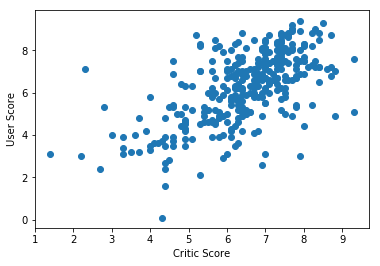

In [180]:
plt.scatter(list(data2['critic_score']),list(data2['user_score']/10))
plt.xlabel('Critic Score')
plt.ylabel('User Score')
plt.show()

In [181]:
cursor.execute("""SELECT
mojo_data.title,
mojo_data.days_in_theater,
mojo_data.gross_revenue,
metacritic.critic_score,
metacritic.user_score 
from metacritic 
JOIN mojo_data
ON metacritic.title = mojo_data.title;
""")
data3 = pd.DataFrame(cursor.fetchall())
data3.columns = [x[0] for x in cursor.description]

In [182]:
data3.dropna(subset = ['user_score'], inplace = True)

In [183]:
data3.dropna(subset = ['gross_revenue'], inplace = True)

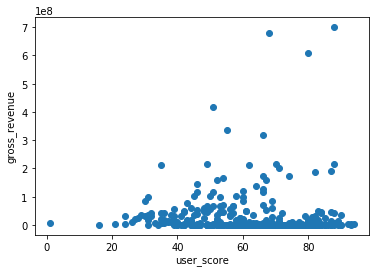

In [188]:
plt.scatter(list(data3['user_score']),list(data3['gross_revenue']))
plt.xlabel('user_score')
plt.ylabel('gross_revenue')
plt.show()

In [185]:
cursor.execute("""SELECT
mojo_data.title,
mojo_data.days_in_theater,
mojo_data.gross_revenue,
metacritic.critic_score,
metacritic.user_score 
from metacritic 
JOIN mojo_data
ON metacritic.title = mojo_data.title;
""")
data4 = pd.DataFrame(cursor.fetchall())
data4.columns = [x[0] for x in cursor.description]

In [190]:
cursor.description

[('title', 253, None, None, None, None, 1, 0),
 ('days_in_theater', 3, None, None, None, None, 1, 32768),
 ('gross_revenue', 3, None, None, None, None, 1, 32768),
 ('critic_score', 4, None, None, None, None, 1, 32768),
 ('user_score', 4, None, None, None, None, 1, 32768)]

In [186]:
data4.dropna(subset = ['critic_score'], inplace = True)

In [187]:
data4.dropna(subset = ['gross_revenue'], inplace = True)

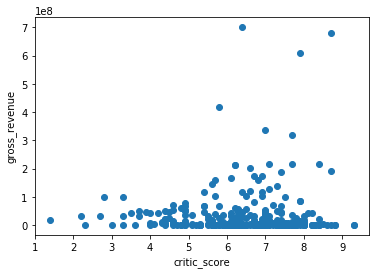

In [189]:
plt.scatter(list(data4['critic_score']),list(data4['gross_revenue']))
plt.xlabel('critic_score')
plt.ylabel('gross_revenue')
plt.show()